## TASK OVERVIEW
Task Overview
The tasks involved pre-processing two datasets, creating machine learning models for classification and regression, and saving the results and models. Here's a breakdown of each task and the observations from the datasets provided:

Pre-process the dataset "Bike_Sales.xlsx":

Objective: Exclude missing data and outliers.
Observation:
The dataset contains various columns, including categorical (e.g., Month, Country, State) and numerical (e.g., Customer Age, Order Quantity, Unit Cost).
The data is quite detailed with financial figures such as Unit Cost, Unit Price, Profit, Cost, and Revenue, which are crucial for analysis.
Save the transformed dataset:

Objective: Save the cleaned dataset as "Sentongo.xlsx".
Observation:
After cleaning, the dataset should be more reliable for training machine learning models, as it excludes rows with missing values and outliers.
Generate a machine learning model to classify "Age_Group":

Objective: Build a classifier to predict the age group of customers.
Observation:
"Age_Group" is a categorical variable with distinct categories such as Youth, Young Adults, Adults.
The Random Forest classifier was chosen for its robustness and ability to handle complex interactions between features.
Save the classifier model:

Objective: Save the classifier model as "age_predictor.pkl".
Observation:
The model can now be reused for predicting the age group of new customers based on similar data.
Generate a machine learning model to predict "Revenue":

Objective: Use the cleaned dataset for training and "Bike_sales_Uganda.xlsx" for testing.
Observation:
The target variable "Revenue" is continuous, making this a regression task.
The dataset "Bike_sales_Uganda.xlsx" should have similar features to ensure consistency in predictions.
Datasets Observations
Bike_Sales.xlsx:

Structure: The dataset includes columns such as Day, Month, Year, Customer Age, Age Group, Customer Gender, Country, State, Product Category, Sub Category, Product, Order Quantity, Unit Cost, Unit Price, Profit, Cost, and Revenue.
Data Types: A mix of categorical and numerical data. Financial figures are presented with currency symbols which need to be stripped for numerical analysis.
Issues: Potential for missing data and outliers which need to be addressed before model training.
Bike_sales_Uganda.xlsx:

Structure: Similar to the first dataset but specific to Uganda, with columns like Date, Day, Month, Year, Customer Age, Age Group, Customer Gender, Country, State, Product Category, Sub Category, Product, Order Quantity, Unit Cost, Unit Price, Profit, Cost, and Revenue.
Data Types: Also a mix of categorical and numerical data.
Issues: Data cleaning steps (like handling missing values and ensuring feature consistency with the training dataset) are crucial for accurate revenue predictions.
Key Takeaways
Pre-processing: Vital to remove missing values and outliers to ensure model accuracy and reliability.
Feature Engineering: One-hot encoding and standardization are necessary for handling categorical variables and scaling numerical features.
Model Selection: Random Forest for classification tasks due to its ability to handle various types of data and interactions; Linear Regression for predicting continuous variables like Revenue.
Model Evaluation: It's essential to evaluate models using metrics like classification reports for classifiers and mean squared error for regressors.
File Handling: Saving cleaned datasets and models allows for reproducibility and further analysis.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import joblib

In [2]:
# Load the datasets
bike_sales = pd.read_excel('Bike_Sales.xlsx')
bike_sales_uganda = pd.read_excel('Bike_sales_Uganda.xlsx')

In [3]:
bike_sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519,2443,1848,3038,4886
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590
2,2017-01-01,1,January,2017,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,2814,4342,7156
3,2017-01-01,1,January,2017,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",2,713,1120,814,1426,2240
4,2017-01-01,1,January,2017,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",2,344,540,392,688,1080


In [4]:
bike_sales.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2020-01-06 01:36:09.376127744,15.665753,2019.520153,35.919212,11.901660,267.296366,452.938427,372.681358,469.318695,842.000053
min,2017-01-01 00:00:00,1.000000,2017.000000,17.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,2019-01-09 00:00:00,8.000000,2019.000000,28.000000,2.000000,2.000000,5.000000,39.000000,28.000000,70.000000
50%,2019-10-16 00:00:00,16.000000,2019.500000,35.000000,10.000000,9.000000,24.000000,135.000000,108.000000,245.000000
75%,2021-01-28 00:00:00,23.000000,2021.000000,43.000000,20.000000,42.000000,70.000000,432.000000,432.000000,880.000000
max,2021-12-31 00:00:00,31.000000,2021.000000,87.000000,32.000000,2171.000000,3578.000000,26158.000000,42978.000000,69136.000000
std,NaN,8.781567,1.179704,11.021936,9.561857,549.835483,922.071219,595.080571,884.866118,1466.202934


In [5]:
bike_sales.shape

(113036, 18)

In [6]:
bike_sales.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [7]:
# Check for missing values
print("Missing values in each column of Bike_Sales:")
print(bike_sales.isnull().sum())

Missing values in each column of Bike_Sales:
Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


DATA VISUALIZATION

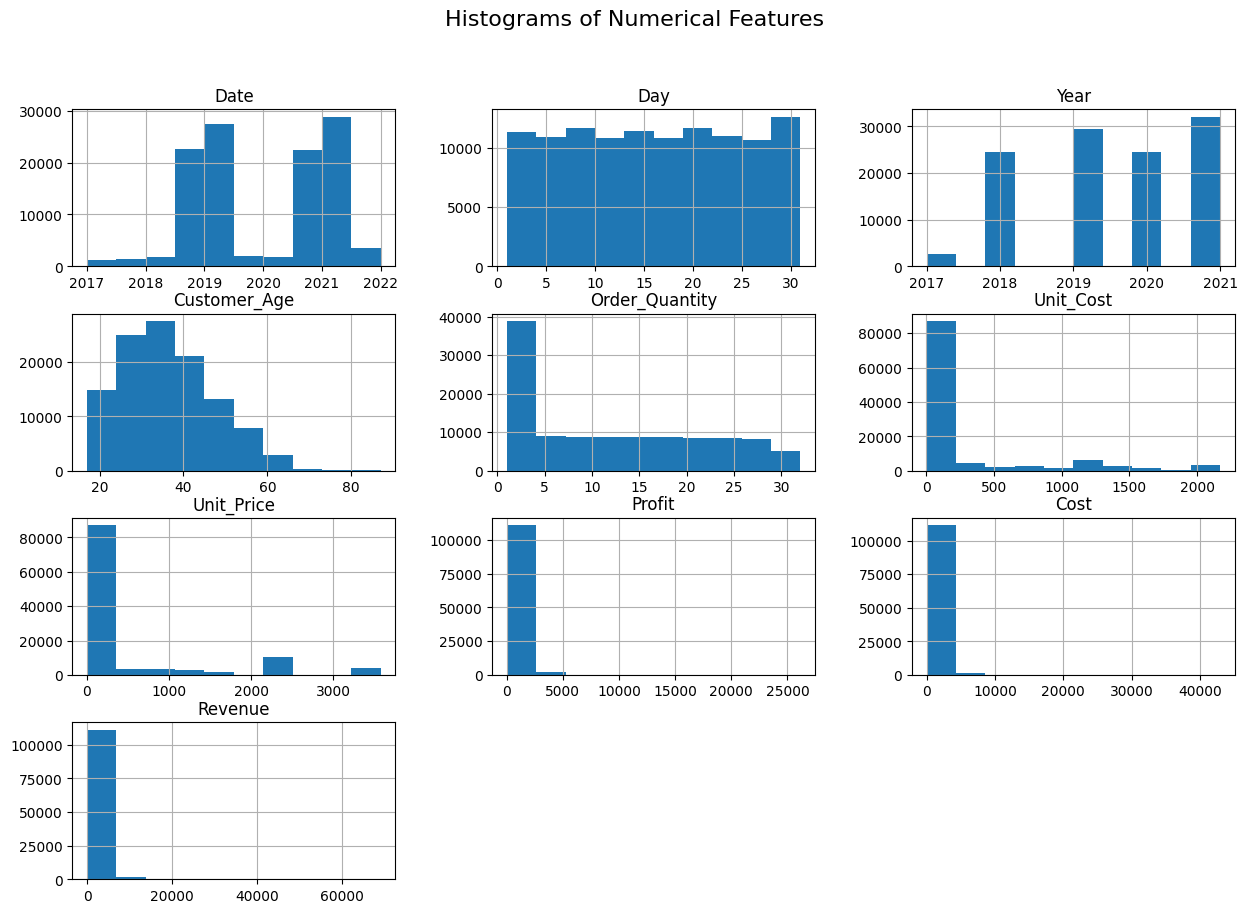

In [8]:
# Data Visualization
## Histograms
bike_sales.hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

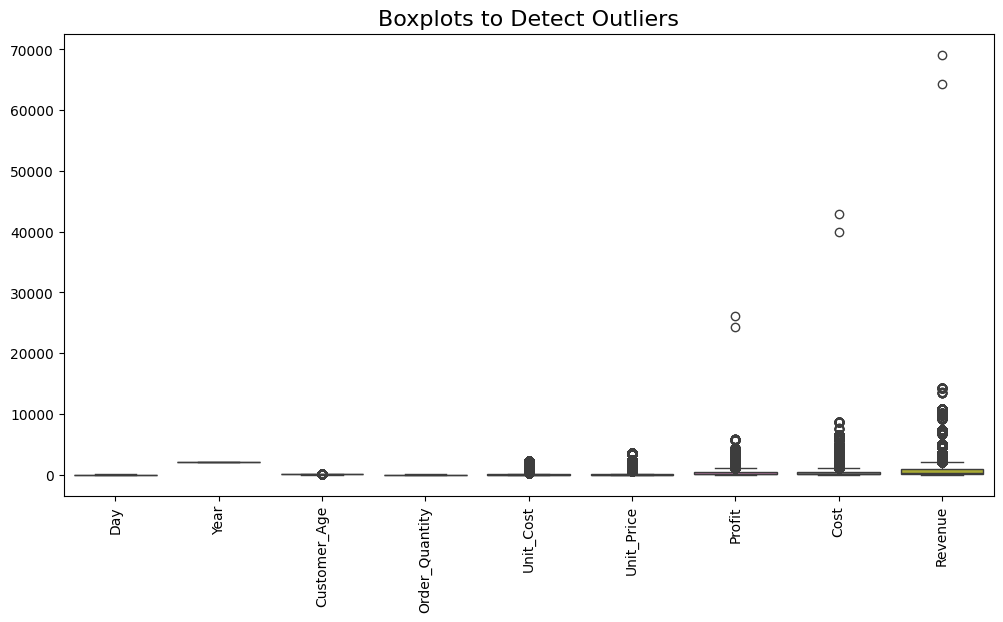

In [9]:
## Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_sales)
plt.xticks(rotation=90)
plt.title('Boxplots to Detect Outliers', fontsize=16)
plt.show()

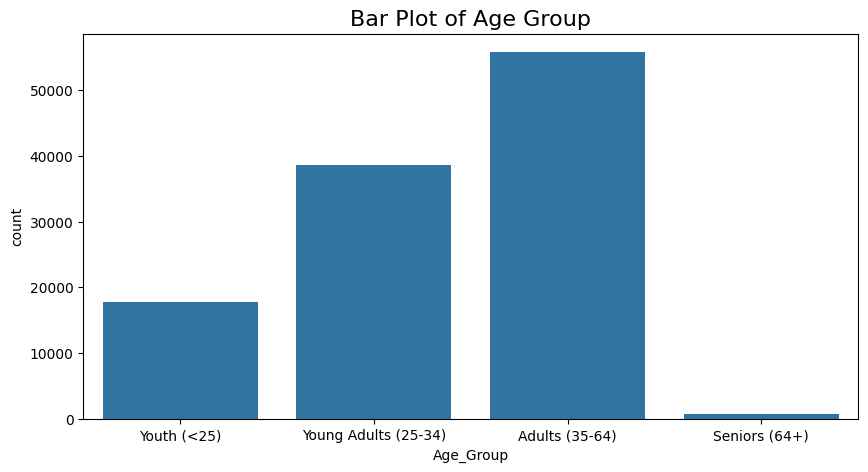

In [10]:
## Bar plots for categorical data
plt.figure(figsize=(10, 5))
sns.countplot(data=bike_sales, x='Age_Group')
plt.title('Bar Plot of Age Group', fontsize=16)
plt.show()

HANDLING OUTLIERS AS SEEN IN THE COLUMNS PROFIT, COST AND REVENUE

In [11]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

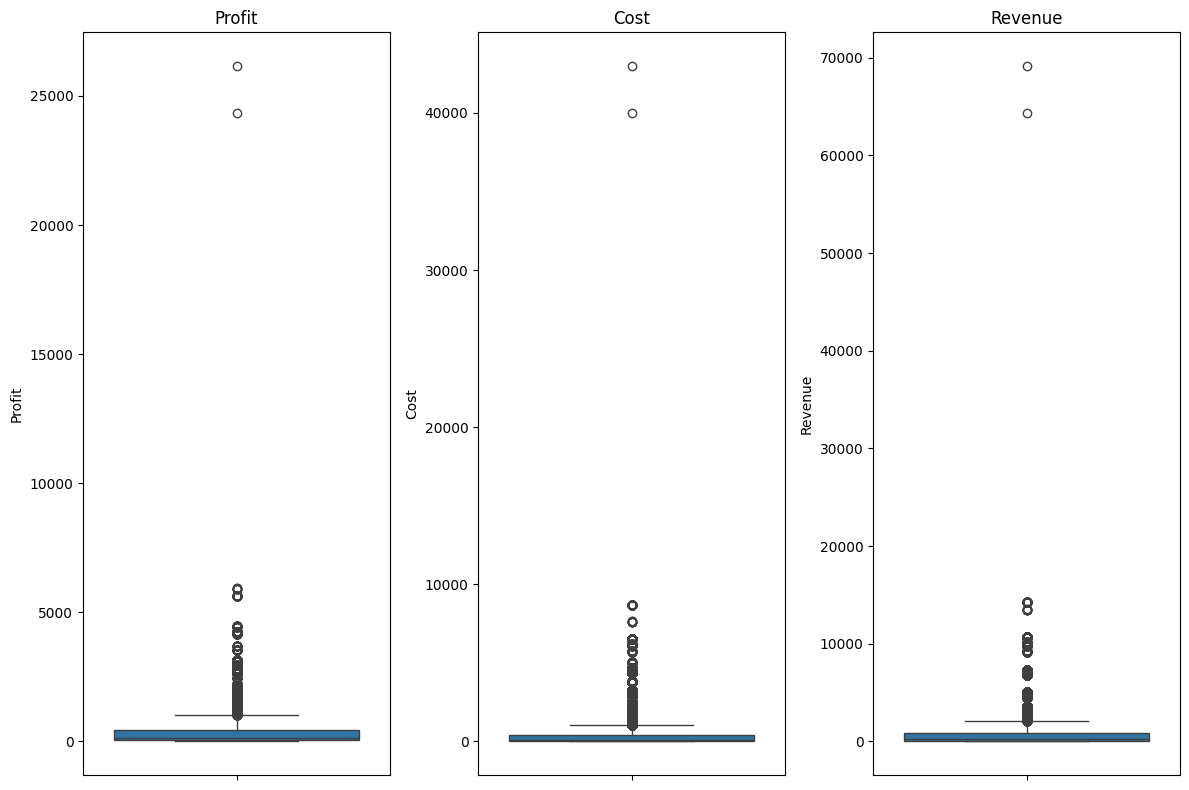

In [12]:
# Plotting boxplots to visualize outliers
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
sns.boxplot(y=bike_sales['Profit'])
plt.title('Profit')

plt.subplot(1, 3, 2)
sns.boxplot(y=bike_sales['Cost'])
plt.title('Cost')

plt.subplot(1, 3, 3)
sns.boxplot(y=bike_sales['Revenue'])
plt.title('Revenue')

plt.tight_layout()
plt.show()


In [13]:
# Removing outliers for relevant columns
columns_with_outliers = ['Profit', 'Cost', 'Revenue']

for column in columns_with_outliers:
    bike_sales = remove_outliers(bike_sales, column)

# Save the cleaned dataset
bike_sales.to_excel('Sentongo.xlsx', index=False)
print("Cleaned dataset saved as 'Sentongo.xlsx'.")

Cleaned dataset saved as 'Sentongo.xlsx'.


In [15]:
# Load the cleaned dataset
bike_sales_cleaned = pd.read_excel('Sentongo.xlsx')

In [16]:
bike_sales_cleaned.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-06,6,January,2017,26,Young Adults (25-34),F,Canada,British Columbia,Bikes,Mountain Bikes,"Mountain-500 Black, 44",2,295,540,490,590,1080
1,2017-01-11,11,January,2017,34,Young Adults (25-34),M,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 40",2,295,540,490,590,1080
2,2017-03-13,13,March,2017,30,Young Adults (25-34),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 48",2,295,540,490,590,1080
3,2017-04-02,2,April,2017,40,Adults (35-64),F,United States,Washington,Bikes,Mountain Bikes,"Mountain-500 Black, 40",2,295,540,490,590,1080
4,2017-04-13,13,April,2017,38,Adults (35-64),M,Germany,Saarland,Bikes,Mountain Bikes,"Mountain-500 Black, 40",2,295,540,490,590,1080


In [18]:
# Select only numerical columns for correlation matrix
numerical_columns = bike_sales_cleaned.select_dtypes(include=[np.number]).columns
correlation_matrix = bike_sales_cleaned[numerical_columns].corr()

In [20]:
def list_columns_by_type(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    continuous_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    return categorical_columns, continuous_columns

# Load the cleaned dataset
bike_sales_cleaned = pd.read_excel('Sentongo.xlsx')

# Get categorical and continuous columns
categorical_columns, continuous_columns = list_columns_by_type(bike_sales_cleaned)

print("Categorical Columns:")
print(categorical_columns)

print("\nContinuous Columns:")
print(continuous_columns)

Categorical Columns:
['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']

Continuous Columns:
['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']


In [34]:
# List of categorical columns
categorical_columns = ['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']

In [35]:
# Remove rows with missing values in the 'Age_Group' column
bike_sales_cleaned = bike_sales_cleaned.dropna(subset=['Age_Group'])

In [36]:
# Encode categorical variables using one-hot encoding
bike_sales_encoded = pd.get_dummies(bike_sales_cleaned, columns=categorical_columns[:-1])  # Exclude 'Age_Group'


In [37]:
# Encode the target variable 'Age_Group'
age_group_mapping = {
    'Youth (<25)': 0,
    'Young Adults (25-34)': 1,
    'Adults (35-64)': 2,
    'Seniors (65+)': 3
}
bike_sales_encoded['Age_Group'] = bike_sales_cleaned['Age_Group'].map(age_group_mapping)

# Ensure that 'Product' is also encoded
bike_sales_encoded = pd.get_dummies(bike_sales_encoded, columns=['Product'])

In [38]:
# Define features and target variable
X = bike_sales_encoded.drop(['Age_Group', 'Date'], axis=1)  # Dropping 'Date' as it is not needed for classification
y = bike_sales_encoded['Age_Group']


In [39]:
# Check for any remaining missing values in X or y
missing_X = X.isnull().sum().sum()
missing_y = y.isnull().sum()
if missing_X > 0 or missing_y > 0:
    print(f"Missing values in X: {missing_X}, Missing values in y: {missing_y}")
    print("Missing values per column in X:\n", X.isnull().sum())
    print("Missing values in y:", y.isnull().sum())

Missing values in X: 0, Missing values in y: 656
Missing values per column in X:
 Day                                   0
Year                                  0
Customer_Age                          0
Order_Quantity                        0
Unit_Cost                             0
                                     ..
Product_Touring-3000 Yellow, 62       0
Product_Water Bottle - 30 oz.         0
Product_Women's Mountain Shorts, L    0
Product_Women's Mountain Shorts, M    0
Product_Women's Mountain Shorts, S    0
Length: 187, dtype: int64
Missing values in y: 656


In [40]:
# Remove rows with missing values in y
X = X[~y.isnull()]
y = y.dropna()

In [41]:
# Verify there are no more missing values
if X.isnull().any().any() or y.isnull().any():
    raise ValueError("There are still missing values in the dataset after preprocessing.")


In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Build the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2832
         1.0       1.00      1.00      1.00      5953
         2.0       1.00      1.00      1.00      8645

    accuracy                           1.00     17430
   macro avg       1.00      1.00      1.00     17430
weighted avg       1.00      1.00      1.00     17430

Confusion Matrix:
 [[2832    0    0]
 [   0 5953    0]
 [   0    0 8645]]


In [45]:
# Save the model
joblib.dump(rf_model, 'age_predictor.joblib')
print("Model saved as 'age_predictor.joblib'.")

Model saved as 'age_predictor.joblib'.


QUESTION 5

## TASKS
Step 1: Load and Clean the Datasets
First, we'll load the datasets "Sentongo.xlsx" (training) and "Bike_sales_Uganda.xlsx" (testing), clean them, and prepare them for modeling.

Step 2: Train the Machine Learning Model
We'll train a machine learning model to predict the "Revenue" using the cleaned training dataset.

Step 3: Save the Model
The trained model will be saved using joblib or pickle as "Revenue_predictor".

Step 4: Predict Revenue on Testing Data
We'll use the saved model to predict "Revenue" for the testing dataset.

Step 5: Save the Predictions
Finally, we'll save the output predictions as a CSV file named "Revenue_prediction.csv".

In [60]:
# Load and clean the datasets
train_data = pd.read_excel("Sentongo.xlsx")
test_data = pd.read_excel("Bike_sales_Uganda.xlsx")

In [61]:
# Function to explore the dataset
def explore_data(df, name):
    """
    Explore the dataset by checking for missing data, duplicates, description, columns, and shape.

    Args:
        df (pd.DataFrame): The dataframe to explore.
        name (str): The name of the dataset.
    """
    print(f"--- {name} Dataset ---")
    print("Shape:", df.shape)
    print("Columns:", df.columns)
    print("Description:\n", df.describe())
    print("Missing Values:\n", df.isnull().sum())
    print("Duplicate Rows:", df.duplicated().sum())
    print("\n")

In [62]:
# Explore the training data
explore_data(train_data, "Training")

--- Training Dataset ---
Shape: (87804, 18)
Columns: Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')
Description:
                                 Date           Day          Year  \
count                          87804  87804.000000  87804.000000   
mean   2020-01-21 22:55:13.161131776     15.669332   2019.562514   
min              2017-01-06 00:00:00      1.000000   2017.000000   
25%              2019-01-25 00:00:00      8.000000   2019.000000   
50%              2019-07-28 00:00:00     16.000000   2019.000000   
75%              2021-01-27 00:00:00     23.000000   2021.000000   
max              2021-12-30 00:00:00     31.000000   2021.000000   
std                              NaN      8.788957      1.119745   

       Customer_Age  Order_Quantity     Unit_Cos

In [63]:
# Explore the testing data
explore_data(test_data, "Testing")

--- Testing Dataset ---
Shape: (23, 18)
Columns: Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')
Description:
              Day         Year  Customer_Age  Order_Quantity  Unit_Cost  \
count  23.000000    23.000000     23.000000       23.000000  23.000000   
mean    1.217391  2020.434783     32.739130       20.043478   7.130435   
std     0.421741     0.506870      8.555792       20.191083  11.017772   
min     1.000000  2020.000000     19.000000        2.000000   1.000000   
25%     1.000000  2020.000000     28.500000        7.000000   1.500000   
50%     1.000000  2020.000000     33.000000       21.000000   2.000000   
75%     1.000000  2021.000000     41.000000       26.000000   7.500000   
max     2.000000  2021.000000     45.000000      100.000000  42.000000   

In [64]:
# Check for duplicate rows before dropping
print(f"Number of duplicate rows before dropping: {train_data.duplicated().sum()}")

Number of duplicate rows before dropping: 865


In [65]:
def check_duplicated_columns(df):
    """
    Check which columns in the dataframe have duplicated data.

    Args:
        df (pd.DataFrame): The dataframe to check.

    Returns:
        dict: A dictionary with column names as keys and the number of duplicated values as values.
    """
    duplicated_info = {}
    for column in df.columns:
        duplicated_count = df[column].duplicated().sum()
        duplicated_info[column] = duplicated_count
    return duplicated_info

# Check for duplicated data in each column
duplicated_columns = check_duplicated_columns(train_data)

# Display columns with duplicated data
for column, count in duplicated_columns.items():
    if count > 0:
        print(f"Column '{column}' has {count} duplicated values")

Column 'Date' has 86550 duplicated values
Column 'Day' has 87773 duplicated values
Column 'Month' has 87792 duplicated values
Column 'Year' has 87799 duplicated values
Column 'Customer_Age' has 87734 duplicated values
Column 'Age_Group' has 87800 duplicated values
Column 'Customer_Gender' has 87802 duplicated values
Column 'Country' has 87798 duplicated values
Column 'State' has 87752 duplicated values
Column 'Product_Category' has 87801 duplicated values
Column 'Sub_Category' has 87787 duplicated values
Column 'Product' has 87722 duplicated values
Column 'Order_Quantity' has 87772 duplicated values
Column 'Unit_Cost' has 87781 duplicated values
Column 'Unit_Price' has 87778 duplicated values
Column 'Profit' has 87532 duplicated values
Column 'Cost' has 87584 duplicated values
Column 'Revenue' has 87502 duplicated values


In [52]:
# Drop duplicate rows
train_data_clean = train_data.drop_duplicates()

# Check for duplicate rows after dropping
print(f"Number of duplicate rows after dropping: {train_data_clean.duplicated().sum()}")


Number of duplicate rows after dropping: 0


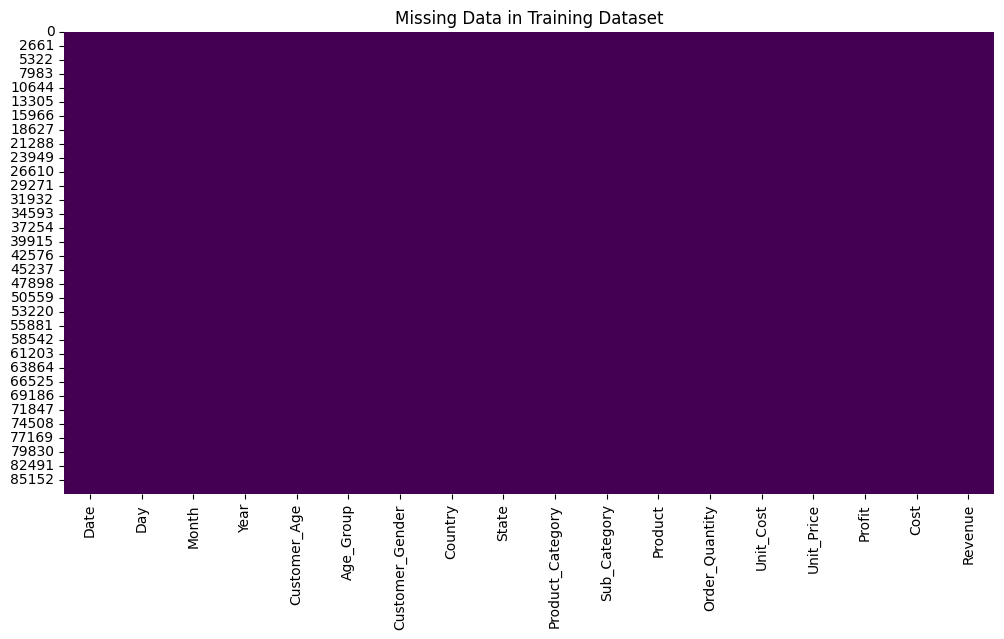

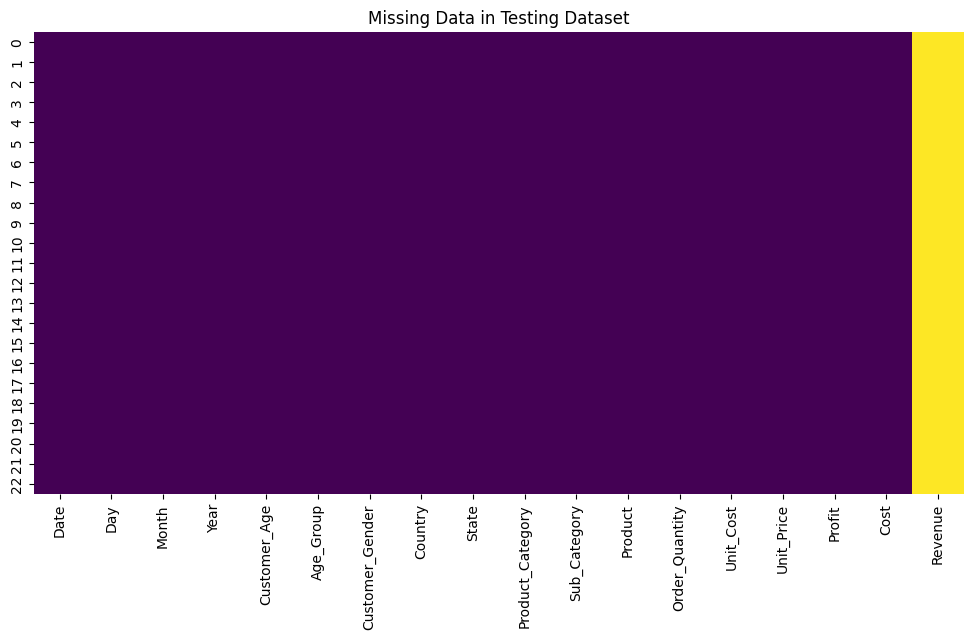

In [53]:
# # Visualize missing data
# def plot_missing_data(df, name):
#     """
#     Plot the missing data for the dataframe.

#     Args:
#         df (pd.DataFrame): The dataframe to plot.
#         name (str): The name of the dataset.
#     """
#     plt.figure(figsize=(12, 6))
#     sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
#     plt.title(f"Missing Data in {name} Dataset")
#     plt.show()

# plot_missing_data(train_data, "Training")
# plot_missing_data(test_data, "Testing")

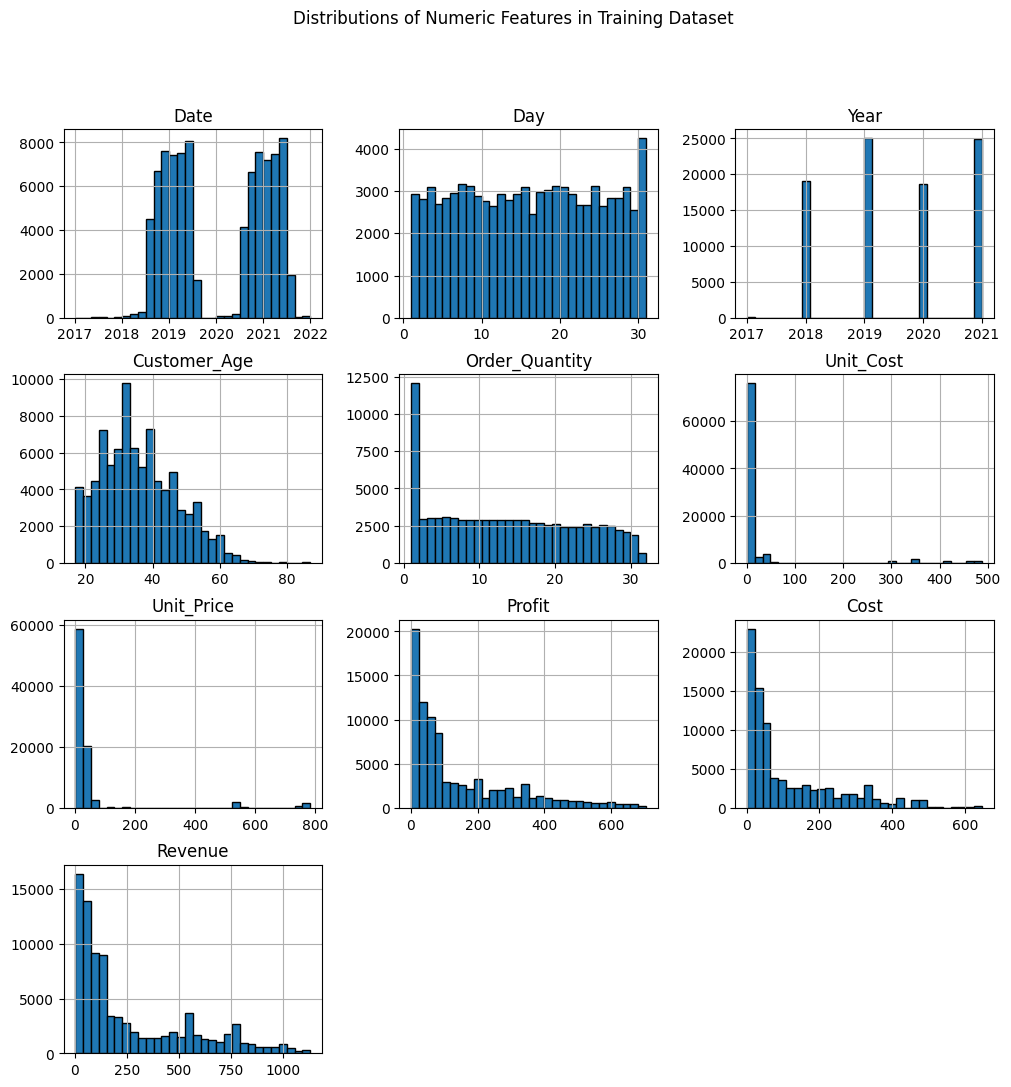

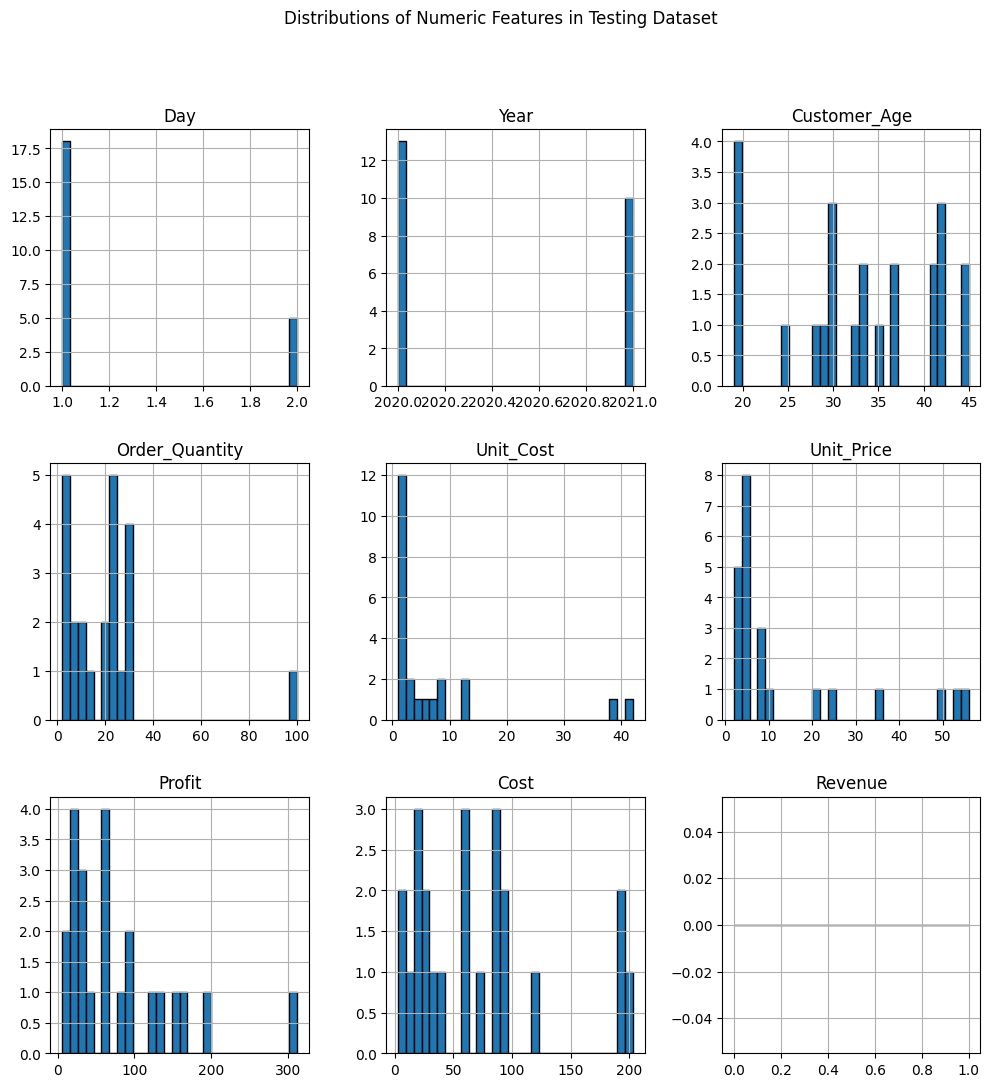

In [54]:
# # Visualize distributions of numeric features
# def plot_distributions(df, name):
#     """
#     Plot the distributions of numeric features in the dataframe.

#     Args:
#         df (pd.DataFrame): The dataframe to plot.
#         name (str): The name of the dataset.
#     """
#     df.hist(figsize=(12, 12), bins=30, edgecolor='black')
#     plt.suptitle(f"Distributions of Numeric Features in {name} Dataset")
#     plt.show()

# plot_distributions(train_data, "Training")
# plot_distributions(test_data, "Testing")

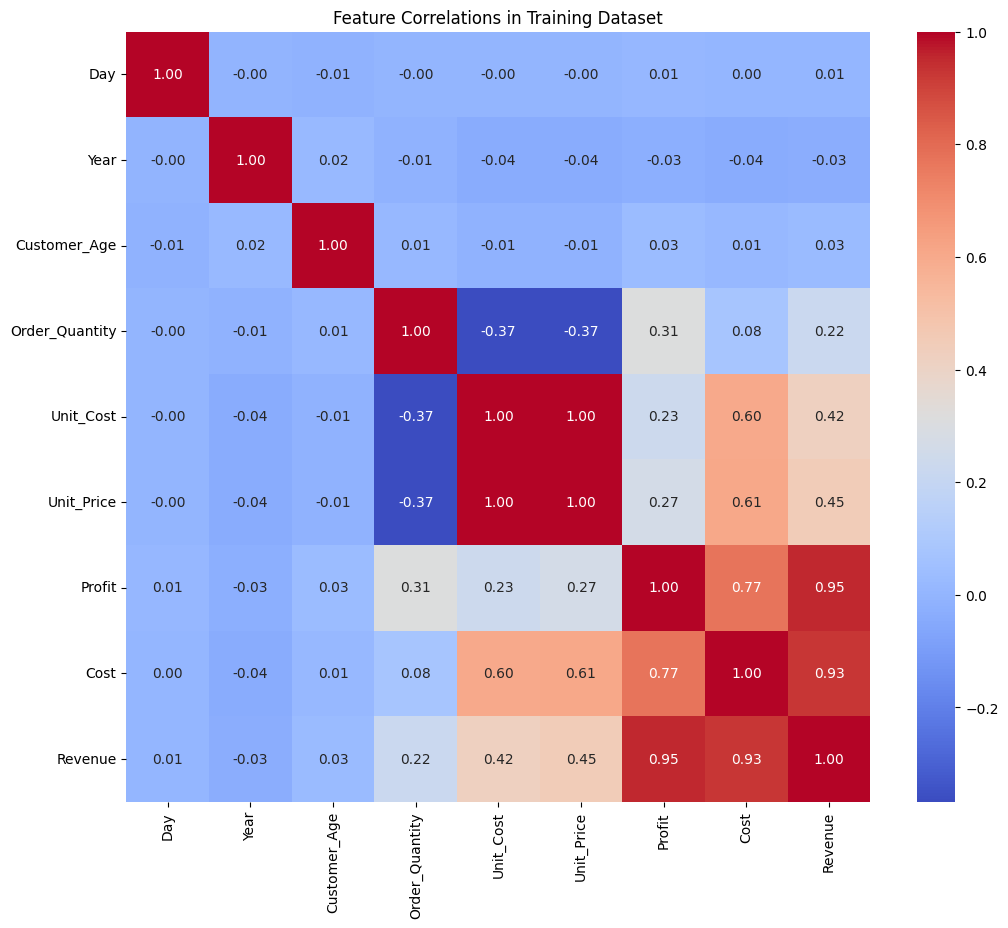

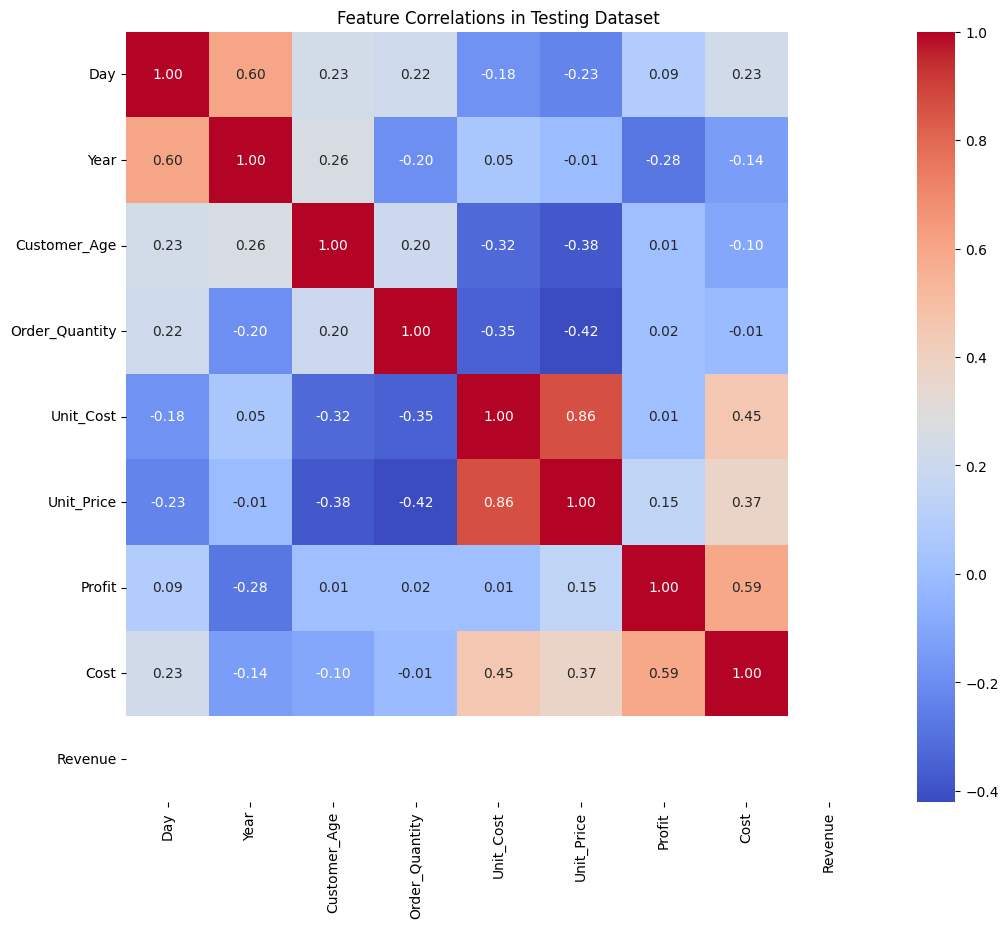

In [57]:
# def plot_correlations(df, name):
#     """
#     Plot the correlations between numeric features in the dataframe.

#     Args:
#         df (pd.DataFrame): The dataframe to plot.
#         name (str): The name of the dataset.
#     """
#     # Select only numeric columns
#     numeric_df = df.select_dtypes(include=['number'])
    
#     plt.figure(figsize=(12, 10))
#     sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
#     plt.title(f"Feature Correlations in {name} Dataset")
#     plt.show()

# # Plot correlations
# plot_correlations(train_data, "Training")
# plot_correlations(test_data, "Testing")